**Initiation of Customer Churn Analysis.**

Importing required libraries like NumPy, Pandas, Matplotlib, Seaborn, Pylab and Sys.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

**Dataset exploration & preparation**

Loading the Customer Churn CSV data file into pandas Dataframe. Printing the head to review if the import is successful.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pavanshetiya/ds/main/Customer%20Churn%20Data.csv')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [ ]:
df.shape

(11260, 19)

The dataframe has 11260 rows with 19 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

Datatype mismatch observed on column/variables like Tenure, Account_user_count, etc. which must be handled during cleanup.

In [ ]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

Null data observed on column/variables like Tenure, City_Tier, etc. which must be treated.

In [ ]:
#review categorical column for data accuracy.
#df.Churn.unique()
#df.Tenure.unique()
#df.City_Tier.unique()
#df.Payment.unique()
#df.Gender.unique()
#df.Service_Score.unique()
#df.account_segment.unique()
#df.CC_Agent_Score.unique()
#df.Marital_Status.unique()
#df.cashback.unique()
#df.Login_device.unique()

#review continuous column for data accuracy.
#df.CC_Contacted_LY.unique()
#df.Account_user_count.unique()
#df.rev_per_month.unique()
#df.Complain_ly.unique()
#df.rev_growth_yoy.unique()
#df.coupon_used_for_payment.unique()
df.Day_Since_CC_connect.unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', nan, '11', '10',
       '9', '13', '12', '17', '16', '14', '30', '$', '46', '18', '31',
       '47'], dtype=object)

There were space characters found on few columns.
Presence of junk/special characters found on column/variables like Tenure, Day_Since_CC_connect, etc. which must be cleared.

**4 Data Cleaning and Preprocessing**

**a. Removal of unwanted variables**

In [ ]:
#dropping this column as insights cannot be derived from it
df.drop(['AccountID'],axis=1,inplace=True)

**b. Missing Value Treatment**

AccountID columns id cleaned while entire dataset underwent trimming space characters as first level cleanup.

In [ ]:
#strip spaces
df.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [ ]:
#special character replacement within string
df.Tenure = df.Tenure.str.replace('[^0-9]', '', regex=True)
df.Account_user_count = df.Account_user_count.str.replace('[^0-9]','',regex=True)
df.rev_per_month = df.rev_per_month.str.replace('[^0-9]','',regex=True)
df.rev_growth_yoy = df.rev_growth_yoy.str.replace('[^0-9]','',regex=True)
df.coupon_used_for_payment = df.coupon_used_for_payment.str.replace('[^0-9]','',regex=True)
df.Day_Since_CC_connect = df.Day_Since_CC_connect.str.replace('[^0-9]','',regex=True)
df.cashback = df.cashback.str.replace('$','')
df.Login_device = df.Login_device.str.replace('&&&&','')

#Replace empty cells with NULL
df.Tenure = df.Tenure.replace('', np.nan)
df.Account_user_count = df.Account_user_count.replace('', np.nan)
df.rev_per_month = df.rev_per_month.replace('', np.nan)
df.Login_device = df.Login_device.replace('', np.nan)
df.rev_growth_yoy = df.rev_growth_yoy.replace('', np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace('', np.nan)
df.Day_Since_CC_connect = df.Day_Since_CC_connect.replace('', np.nan)
df.cashback = df.cashback.replace('', np.nan)

#Manual data correction on gender TBD
df.Gender.replace({'F':'Female','M':'Male'}, inplace=True)
df.account_segment.replace({'Super +':'Super Plus', 'Regular +':'Regular Plus'}, inplace=True)

<ipython-input-96-402458b69092>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.cashback = df.cashback.str.replace('$','')


Special values were replaced with empty string in order to handle embedded special characters. Once special charactes are eliminated, empty datasets across variables were replaced with NULL value.
Duplicate values found under categorical variable "gender" and same is been treated with replacement to hold uniform values.

In [ ]:
#validate the duplicate categorical replacement
df.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
df.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [ ]:
#categorical variables
df.fillna({
    "City_Tier": df.City_Tier.mean(),
    "CC_Contacted_LY": round(df.CC_Contacted_LY.mean(),0),
    "Payment": df.Payment.mode()[0],
    "Gender": df.Gender.mode()[0],
    "Service_Score": df.Service_Score.mean(),
    "account_segment": df.account_segment.mode()[0],
    "CC_Agent_Score": round(df.CC_Agent_Score.mean(), 0),
    "Marital_Status": df.Marital_Status.mode()[0],
    "Login_device": df.Login_device.mode()[0]
    },
    inplace=True)

#continuous variables
df.fillna({
    "Tenure": df.Tenure.mode()[0],
    "Account_user_count": df.Account_user_count.mode()[0],
    "rev_per_month": df.rev_per_month.mode()[0],
    "Complain_ly": df.Complain_ly.mean(),
    "rev_growth_yoy": df.rev_growth_yoy.mode()[0],
    "coupon_used_for_payment": df.coupon_used_for_payment.mode()[0],
    "Day_Since_CC_connect": df.Day_Since_CC_connect.mode()[0],
    "cashback": df.cashback.mode()[0]
}, inplace=True)

Null values were treated separately for categorical and continuous variable.
We chose mode value for most of the variables and mean for limited variables. Additionally values been rounded to nearest integer on few categorical columns.

In [ ]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [ ]:
df[df==''].count()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

Dataframe is reviewed and confirmed for cleanup.

In [ ]:
#column datatype review
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

Now that cleanup is completed, we reviewed datatype compatibility and found mismatch on few variables.

In [ ]:
#column type casting
df = df.astype({
    'Tenure':'float64',
    'Account_user_count':'float64',
    'rev_per_month':'float64',
    'rev_growth_yoy':'float64',
    'coupon_used_for_payment':'float64',
    'Day_Since_CC_connect':'float64',
    'cashback':'float64'
})

In [ ]:
#column datatype review
df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

Datatype is been modified for few variables and reviewed for accuracy.

Now we can see that missing value treatment is completely done and data set is good for next process.

**d. Outlier Treatment**

Cleaned dataframe is now undergoing outlier treatment. Mask function is used to treat Lower and Upper limits successfully.*italicised text*

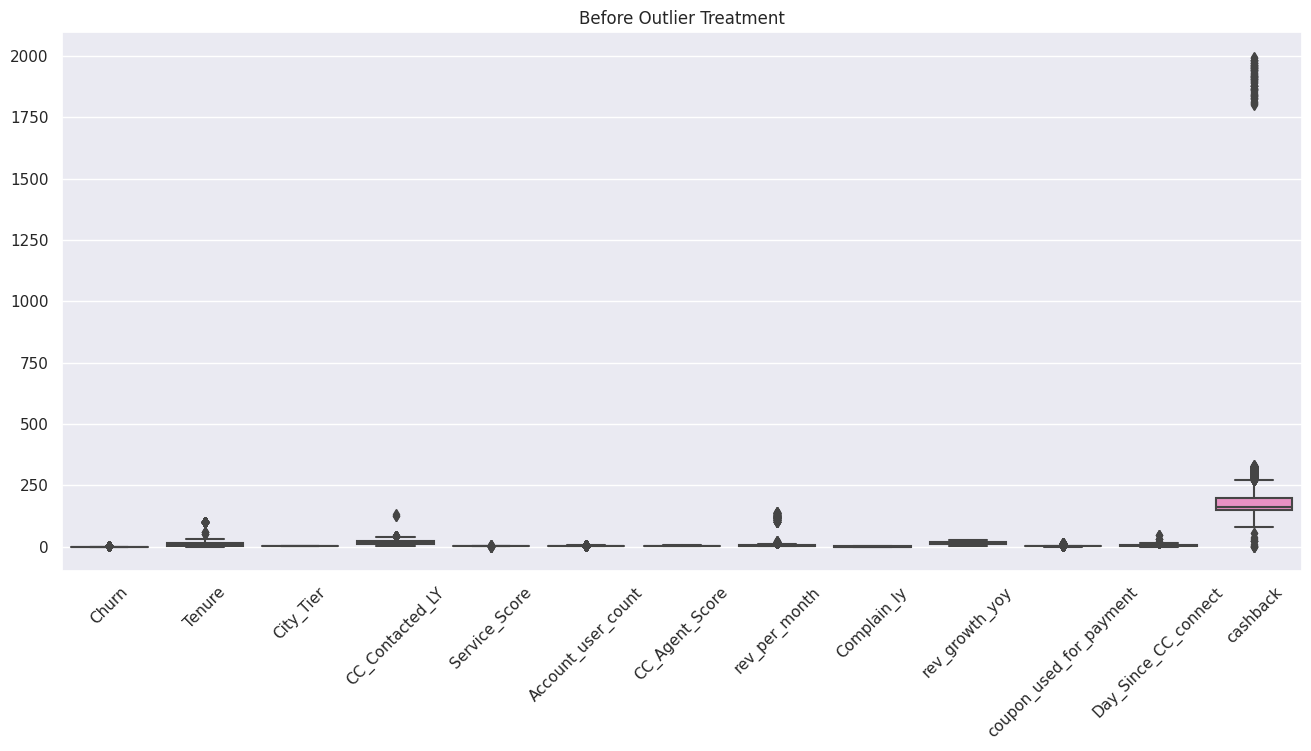

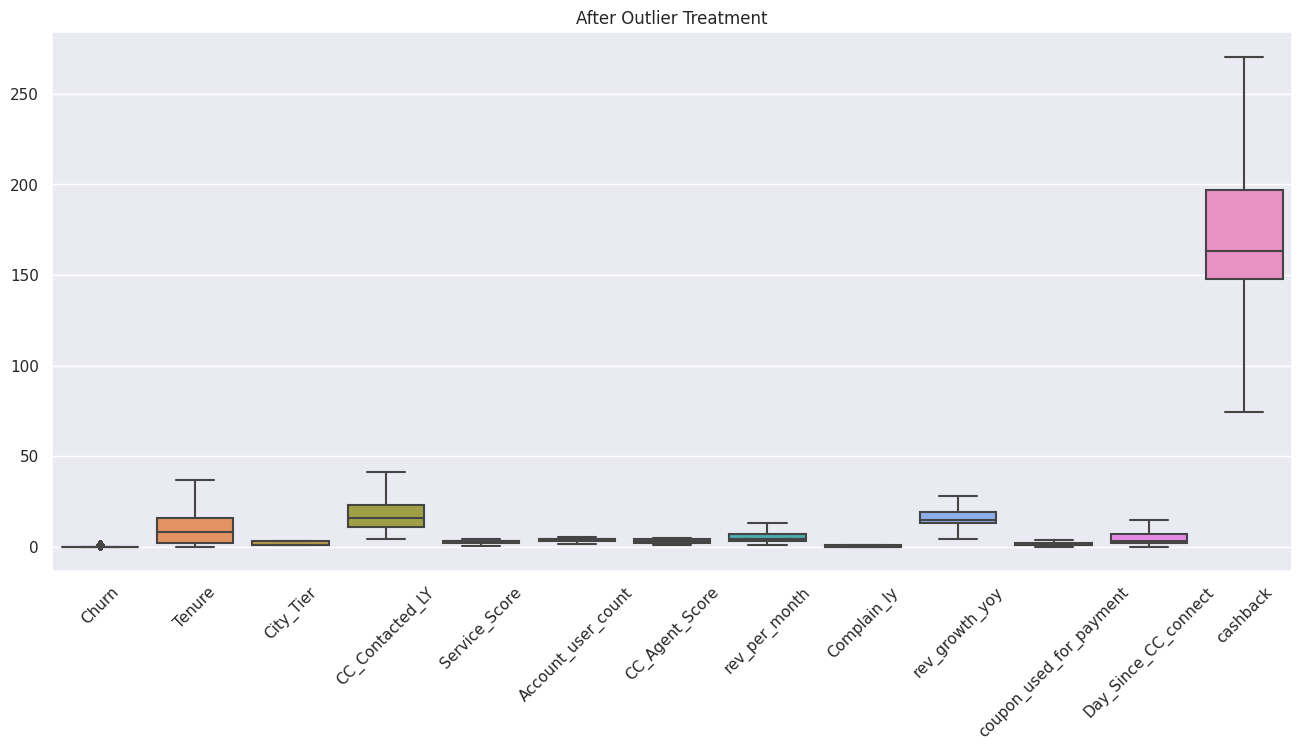

In [ ]:
#Plotting boxplot before treatment
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Before Outlier Treatment")
plt.show()

#outlier treatment using mask function to replace the outlier with Lower\Upper limit respectively.
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

#Plotting boxplot after treatment
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("After Outlier Treatment")
plt.show()

**2. Exploratory Data Analysis**

**a. Univariate Analysis**

In this section we carried out a study on individual variables. Startign with describe function which is used to extract statistical analysis across multiple varialbes of dataframe.


In [ ]:
#Obtaining the statistical values
df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.096536,1.653929,17.833126,2.902660,3.710790,3.065808,5.110302,0.285334,16.192806,1.475311,4.546270,176.649512
std,0.374223,8.978614,0.910453,8.562396,0.720544,0.924278,1.372663,2.936656,0.444377,3.757391,1.102248,3.493493,43.623471
min,0.000000,0.000000,1.000000,4.000000,0.500000,1.500000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,74.500000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,148.000000
50%,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,1.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.000000
max,1.000000,37.000000,3.000000,41.000000,4.500000,5.500000,5.000000,13.000000,1.000000,28.000000,3.500000,14.500000,270.500000


Subsequent analysis is done on individual variables, few of them listed below.
Starting with payment method.

In [ ]:
#Obtaining count of Payment Types, through a pivot on the Payment type
df.groupby(['Payment']).count()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Payment,,,,,,,,,,,,,,,,,
Cash on Delivery,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
Credit Card,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511,3511
Debit Card,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696,4696
E wallet,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217
UPI,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822


In [ ]:
#Calculating a Frequency Table
freq_table = df.groupby(['Payment']).size().reset_index(name='Count').rename(columns={'Paynemt':'Payment'})
freq_table

,Payment,Count
0,Cash on Delivery,1014
1,Credit Card,3511
2,Debit Card,4696
3,E wallet,1217
4,UPI,822


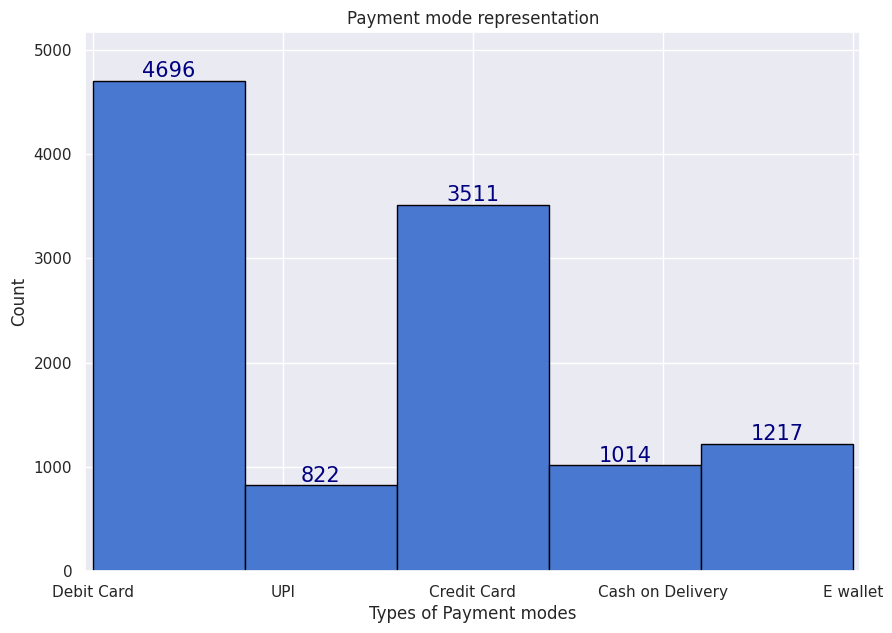

In [ ]:
# Showcasing the most recurring Payment type through chart
plt.figure(figsize=(10, 7))
values, bins, bars=plt.hist(df.Payment, edgecolor='black', bins=5)
plt.title('Payment mode representation')
plt.xlabel('Types of Payment modes')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=15, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

As we see that customer prefer "Debit Card" mode of payment.

Similar analysis is done on "Account Segment"

In [ ]:
#Obtaining count of Account segment, through a pivot on the Account segment
df.groupby(['account_segment']).count()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
account_segment,,,,,,,,,,,,,,,,,
HNI,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639,1639
Regular,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
Regular Plus,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221
Super,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062,4062
Super Plus,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818


In [ ]:
#Calculating a Frequency Table
freq_table = df.groupby(['account_segment']).size().reset_index(name='Count').rename(columns={'account_segemnt':'account_segment'})
freq_table

,account_segment,Count
0,HNI,1639
1,Regular,520
2,Regular Plus,4221
3,Super,4062
4,Super Plus,818


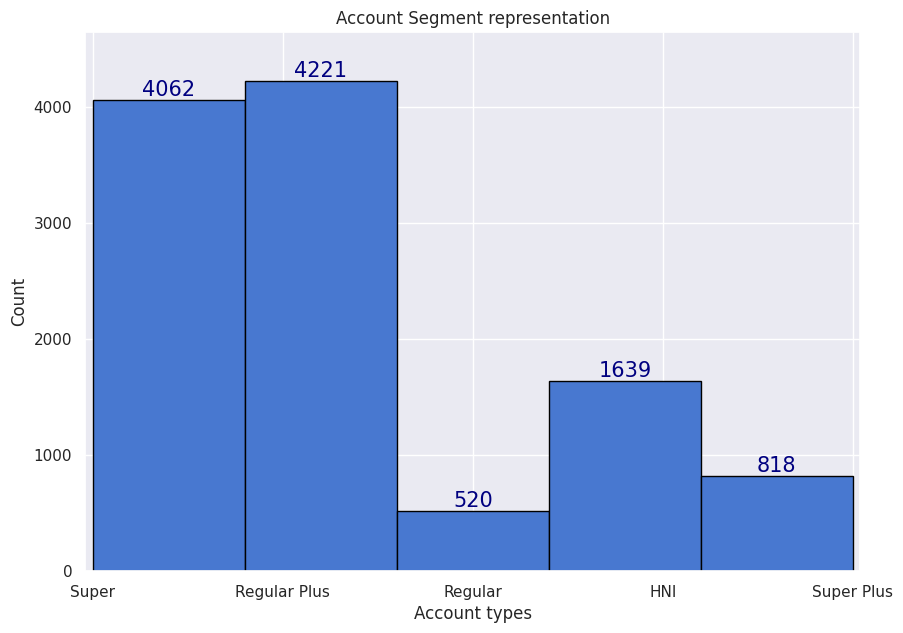

In [ ]:
# Showcasing the highest account type through a chart
plt.figure(figsize=(10, 7))
values, bins, bars=plt.hist(df.account_segment, edgecolor='black', bins=5)
plt.title('Account Segment representation')
plt.xlabel('Account types')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=15, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

We found singnificat accounts subscribed with "Regular Plus" and "Super" segments and moderate supscription with "HNI" and "Super Plus".

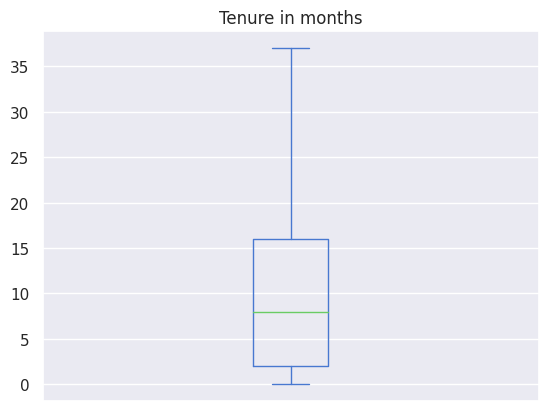

In [ ]:
#Plotting Box plot to describe tenure
df.Tenure.plot.box(title="Tenure in months", xticks=[]);
plt.show()

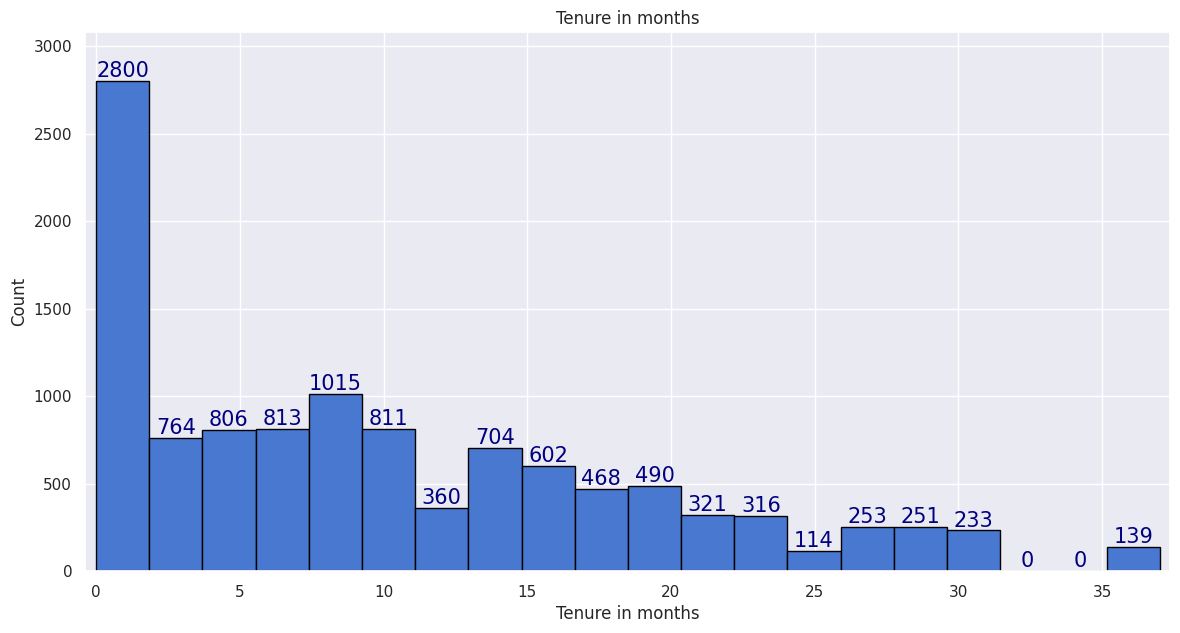

In [ ]:
#Plotting graph to describe Tenure
plt.figure(figsize=(14, 7))
values, bins, bars=plt.hist(df.Tenure, edgecolor='black', bins=20)
plt.title('Tenure in months')
plt.xlabel('Tenure in months')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=15, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

We found significant high number of new customers. Also it is clear that the limited customers were sticking with business in long run which is clearly highlighing the problem statement.

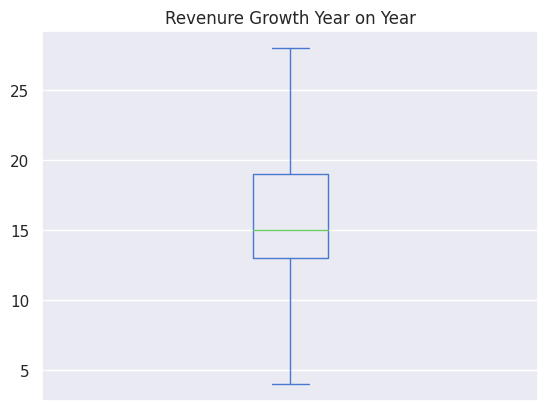

In [ ]:
#Plotting box plot to describe Revenue Growth YoY
df.rev_growth_yoy.plot.box(title="Revenure Growth Year on Year", xticks=[]);
plt.show()

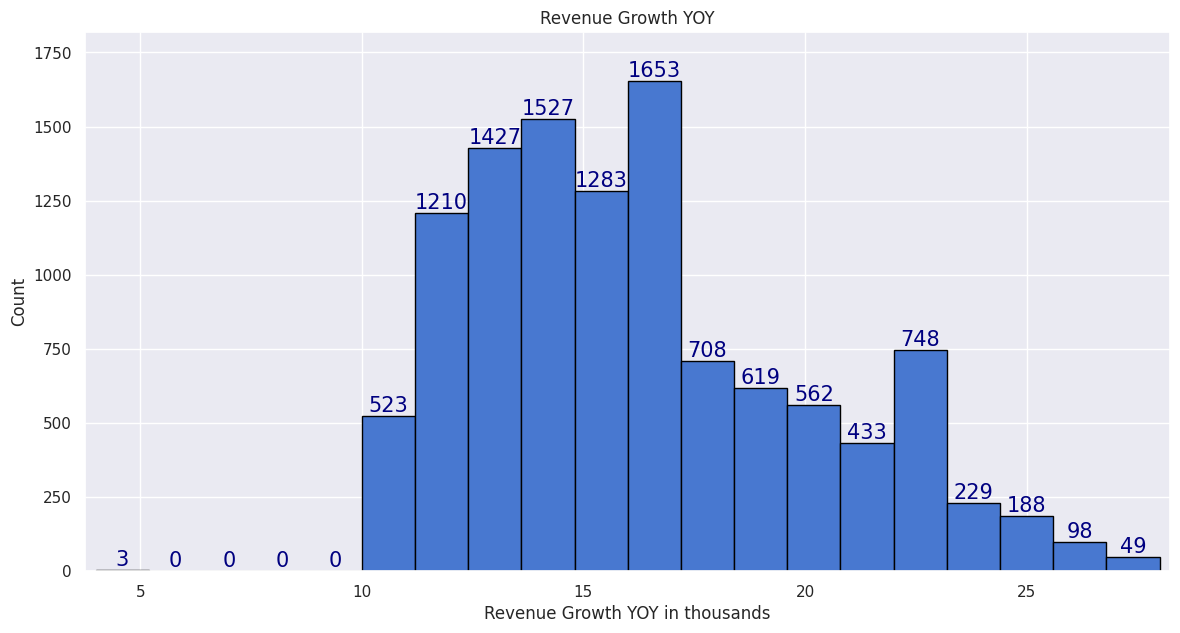

In [ ]:
#Plotting graph to describe Revenue Growth YoY
plt.figure(figsize=(14, 7))
values, bins, bars=plt.hist(df.rev_growth_yoy, edgecolor='black', bins=20)
plt.title('Revenue Growth YOY')
plt.xlabel('Revenue Growth YOY in thousands')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=15, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

Similarly moderate amount of customers contributing to larger portion of YOY growth, further elevating the need for predicting reason for customer churn.

**b. Bivariate Analysis**

Out next focus is to understand corelation between multiple key variables and derive more insights. To start with, we have plotted a heatmap to derive positive and negative corelation between the variables.

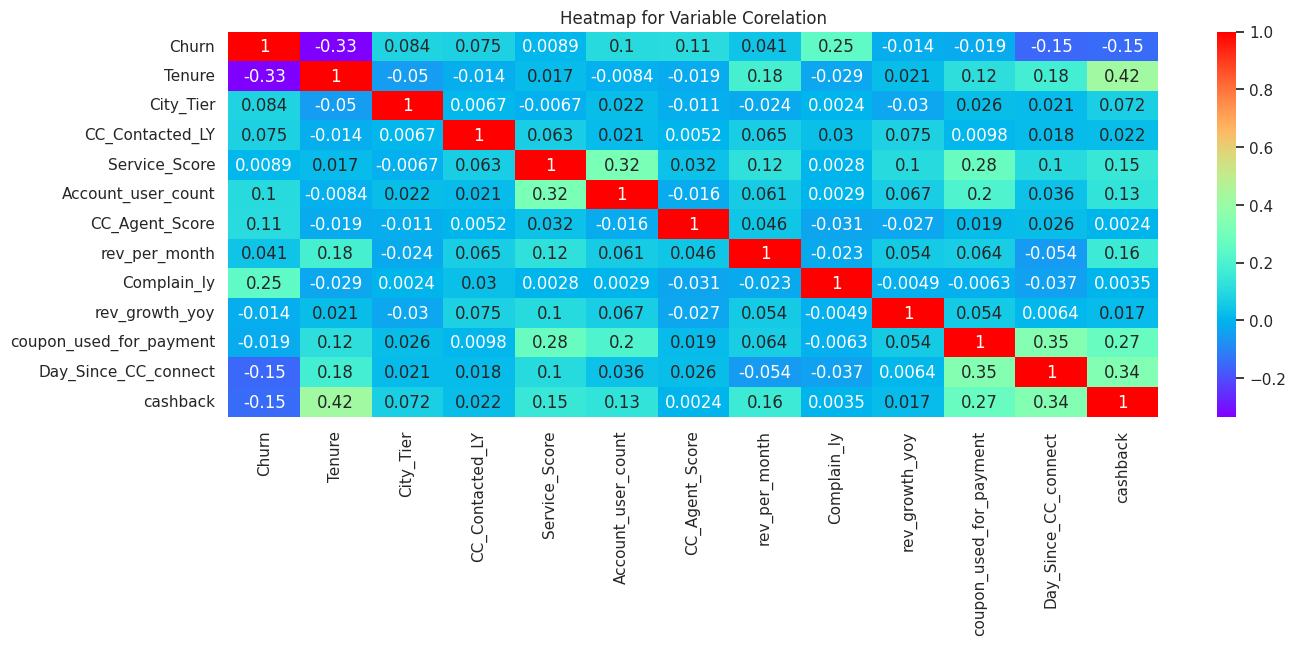

In [ ]:
#Plotting a heatmap to depict Correlation
plt.figure(figsize = (15,5))
sns.heatmap(df[["Churn", "Tenure", "City_Tier", "CC_Contacted_LY", "Service_Score", "Account_user_count", "CC_Agent_Score",
                "rev_per_month", "Complain_ly", "rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect",
                "cashback"]].corr(), annot = True, cmap='rainbow')
plt.title('Heatmap for Variable Corelation')
plt.show()

We find positive corelation between "Day Since CC Connect" and "Coupon used for payment" or "cashback". Similar finding with "tenure" and "cashback".

However it is intersting to note that, "Churn" variable is showing positive corelation with "Complain_Ly" as well as negative corelation with "Day Since CC connect" or "Cashback.

This is a clear indicator that customer is unhappy with the service quality and many of the customer left unsatified.

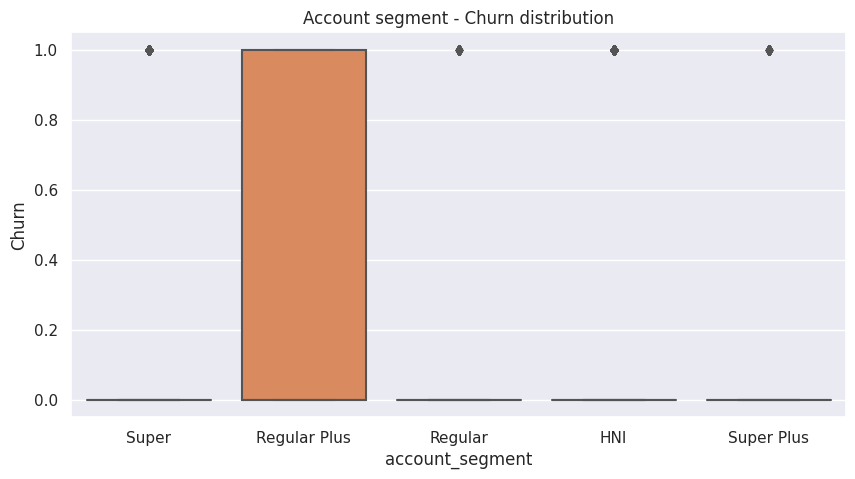

In [ ]:
#Plotting relationship between Account Type and Churn
plt.figure(figsize=(10,5))
sns.boxplot(x='account_segment', y='Churn', data=df)
plt.title('Account segment - Churn distribution')
plt.show()

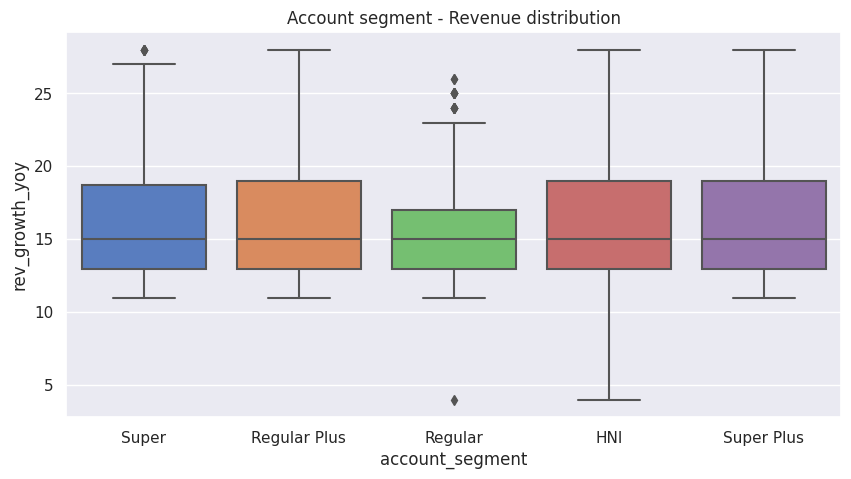

In [ ]:
# Plotting the distribution of Revenue YoY across Account segments
plt.figure(figsize=(10,5))
sns.boxplot(x='account_segment', y='rev_growth_yoy', data=df);
plt.title('Account segment - Revenue distribution')
plt.show()

It is also evident that "Revenue Growth YOY" is spread across the plans which indicates that all the segments offered by business were able to generate long term revinues.


**3.a. Balance Data Analysis**

As churn is the key variable to be used for prediction, status on data balance is reviwed by using Bar and Pie plot.


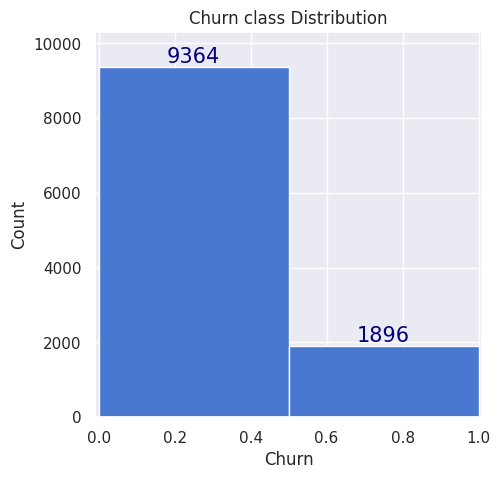

In [ ]:
#data imbalance analysis
plt.figure(figsize=(5, 5))
values, bins, bars=plt.hist(df.Churn, bins=2)
plt.title('Churn class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=15, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

In [ ]:
#data is unbalanced as Churn data provided have a ratio of 83:17
churn_data = df[df.Churn ==1]
nochurn_data = df[df.Churn == 0]
print(churn_data.shape, nochurn_data.shape)

(1896, 18) (9364, 18)


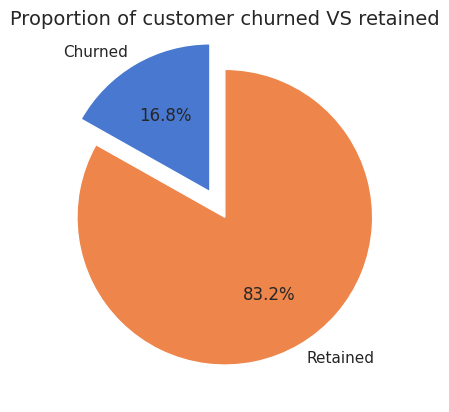

In [ ]:
#Pie plot with percentage distribution
y = np.array([churn_data.shape[0], nochurn_data.shape[0]])
mylabels = ["Churned", "Retained"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%', startangle = 90)
plt.title("Proportion of customer churned VS retained", size = 14)
plt.show()

We found the data is imbalanced against churn variable.
1896 records were found for Churn while 9364 records were non-churnes causing significant imbalance. On percentage form, churn data is limited to 16.8% of overall rows.

**3.b. Business Insights using Clustering**

We use Kmeans clustering technique to derive corelation between dependent variables "Revenue_Per_Month" and "Revenue_Growth_YOY"

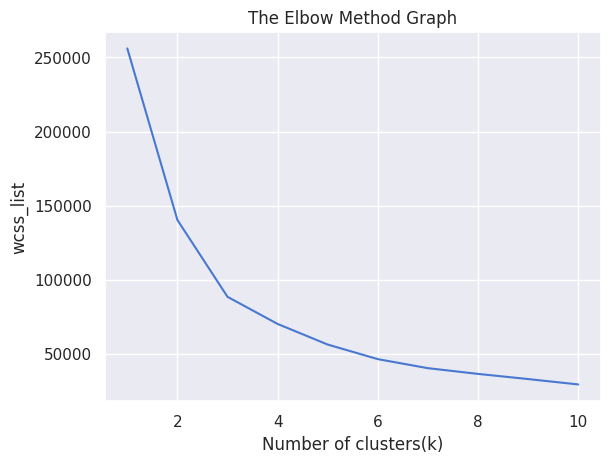

In [ ]:
#3.b: Clustering using KMeans Algorithm
#between Revenue_Per_Month and Revenue_Growth_YOY
dfCluster = df.iloc[:, [11, 13]].values

#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans

#Initializing the list for the values of WCSS
wcss_list= []

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(dfCluster)
    wcss_list.append(kmeans.inertia_)

#Plotting the line graph
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

We see that the elbow point is at 3. Thus the number of clusters will be 3 as we move forward.


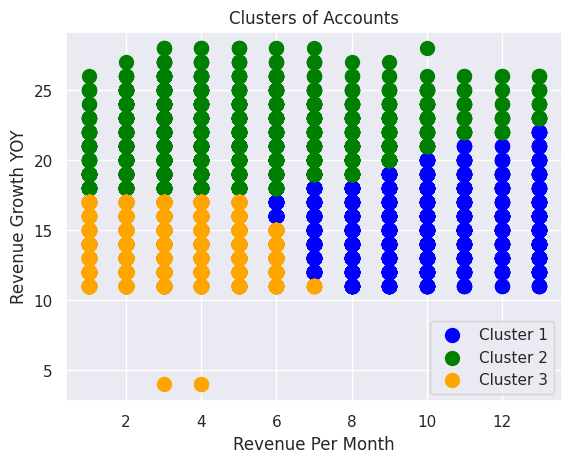

In [ ]:
#We see that the elbow point is at 3 i.e number of clusters will be 3.

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
y_predict = kmeans.fit_predict(dfCluster)

#visulaizing the clusters
plt.scatter(dfCluster[y_predict == 0, 0], dfCluster[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(dfCluster[y_predict == 1, 0], dfCluster[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(dfCluster[y_predict == 2, 0], dfCluster[y_predict == 2, 1], s = 100, c = 'orange', label = 'Cluster 3') #for second cluster

#Plotting the graph between Revenue_Per_Month and Revenue Growth YOY
plt.title('Clusters of Accounts')
plt.xlabel('Revenue Per Month')
plt.ylabel('Revenue Growth YOY')
plt.legend()
plt.show()

It is interesting to see that differentition here. Cluster 3 showcasing the lower contributor and cluster 2 is showcasing higher contributors to the income. It is interesting to observe that cluster 1 which was contributing higher monthly income but lower growth on YOY.

**3.c Other Business Insights**

In order to derive other important insights we try to find corelation with chaurn variable associated with other categorical variables to find any useful trend.

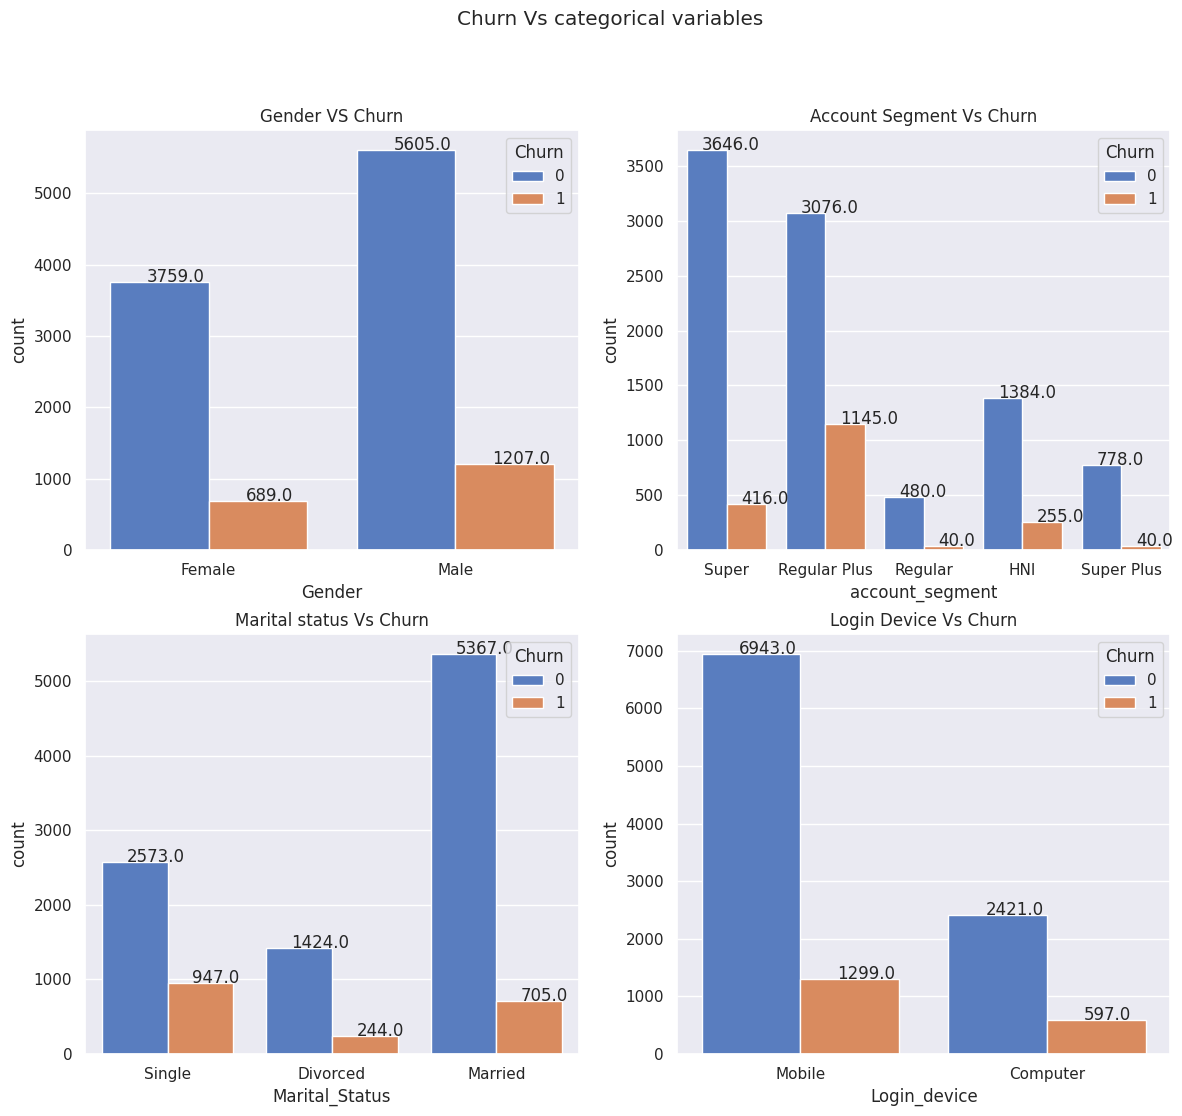

In [ ]:
#3.c: Review the relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
axarr[0, 0].set_title("Gender VS Churn")
axarr[0, 1].set_title("Account Segment Vs Churn")
axarr[1, 0].set_title("Marital status Vs Churn")
axarr[1, 1].set_title("Login Device Vs Churn")
bx=sns.countplot(x='Gender', hue = 'Churn', data = df, ax=axarr[0][0])
for p in bx.patches:
 bx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
bx=sns.countplot(x='account_segment', hue = 'Churn', data = df, ax=axarr[0][1])
for p in bx.patches:
 bx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
bx=sns.countplot(x='Marital_Status', hue = 'Churn', data = df, ax=axarr[1][0])
for p in bx.patches:
 bx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
bx=sns.countplot(x='Login_device', hue = 'Churn', data = df, ax=axarr[1][1])
for p in bx.patches:
 bx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.suptitle("Churn Vs categorical variables")
plt.show()

It was interesting to find customer with marital status "single" and account segment "Regular Plus" have higher churn in proportion.

**5. Model Building and Interpretation**

Basemodel is created using cleaned dataset where chrun variable is separated from rest of the variables.

In [ ]:
#Dataset for basemodel
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Churn"]]
target = "Churn"
data_rest = df[columns]
data_churn = df[target]
print(data_rest.shape, data_churn.shape)

(11260, 17) (11260,)


Undersampling approach was ignored due to the open risk of biased results. This method was also discoraged to be used upon smaller dataset as we are dealign with.

We choose oversampling technique with SMOTE to generate equivalant samples under churn/non-churn data such that minority classed were given fair treatment.

In [ ]:
#oversampling
#approach: get all the records with Churn=1 and create equal no.of samples for each records to match the total

#SMOTENC
from imblearn.over_sampling import SMOTENC

#SMOTENC(#need to give the categorical columns indices as parameters)
smote_nc = SMOTENC(categorical_features=[3,4,7,9,16])

res_rest, res_churn = smote_nc.fit_resample(data_rest, data_churn)
print(res_rest.shape, res_churn.shape)

(18728, 17) (18728,)


We see that after oversampling technique, 11260 records which were initially present been promoted to 18728 records.

In [ ]:
#data balance review
res_churn.value_counts()

1    9364
0    9364
Name: Churn, dtype: int64

It could also be reviwed that records with churn were matching with non-churners upon oversampled dataset.

Next step is to generate train and test data with 70:30 ratio split demonstrated as follows.

In [ ]:
#Generate train and test data
from sklearn.model_selection import train_test_split

#generating 70:30 ratio train test data split
X_train, X_test, y_train, y_test = train_test_split(res_rest, res_churn, test_size=0.30)

Encoding is ordinal data is recommended as string data would result error during classification. Also, it is recommended to perform after split in order to avoid data leakage (train-test contamination) problem.

In [ ]:
#variable encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column_name in X_train.columns:
    if X_train[column_name].dtype == object:
        X_train[column_name] = le.fit_transform(X_train[column_name])
    else:
        pass

for column_name in X_test.columns:
    if X_test[column_name].dtype == object:
        X_test[column_name] = le.fit_transform(X_test[column_name])
    else:
        pass

At this point we choose to transform the variables using Standard Scalar library.

In [ ]:
#Variable Transformation
#Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#TBD : order definition

**5.a Model Building - Decision Tree**

As we have completed generating train and test data, we are proceeding with building our first model. We shall start with few reusable functions required evaluation class import.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#method definition to evaludate data accuracy
def test_accuracy(classifier):
    print("Train Accuracy:", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy:", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

In [ ]:
#method definition to evaluate the model
def evaluate_model(classifier):
    test_accuracy(classifier)
    print("-"*50)
    print("Classification report:")
    print(classification_report(y_test, y_predict))
    print("-"*50)
    print("AUC Score:", roc_auc_score(y_test, y_predict))
    print("-"*50)
    cm = confusion_matrix(y_test, y_predict)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    plt.title("Confusion Matrix")
    plt.grid()

In [ ]:
#method definition for important features
def get_fetures(classifier):
    #Feature Importance
    importance = classifier.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f, Name: %s' % (i,v,columns[i]))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.title("Important Features")
    plt.show()

In [ ]:
#method definition for model validation
def validate_model(classifier):
    print("10 Folds Cross Validation:")
    clf_score = cross_val_score(classifier, X_train, y_train, cv=10)
    print(clf_score)
    print("Mean:", clf_score.mean())

Train Accuracy: 1.0
Train Confusion Matrix:
[[6627    0]
 [   0 6482]]
--------------------------------------------------
Test Accuracy: 0.9533724862075103
Test Confusion Matrix:
[[2581  156]
 [ 106 2776]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2737
           1       0.95      0.96      0.95      2882

    accuracy                           0.95      5619
   macro avg       0.95      0.95      0.95      5619
weighted avg       0.95      0.95      0.95      5619

--------------------------------------------------
AUC Score: 0.95311163719629
--------------------------------------------------


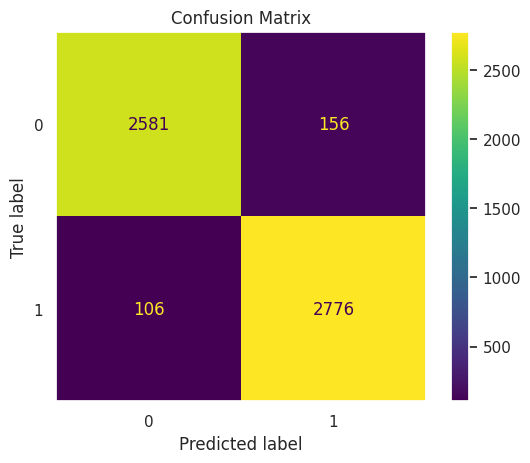

In [ ]:
#model building and evaluation : Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(random_state=0)
y_predict = model_dtree.fit(X_train, y_train).predict(X_test)

evaluate_model(model_dtree)

**Model Tuning : Decision Tree**

In [ ]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search.cv_results_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [ ]:
#Derive best combination for tuning
dt_best = grid_search.best_estimator_
test_accuracy(dt_best)

Train Accuracy: 0.9748264551071782
Train Confusion Matrix:
[[6480  147]
 [ 183 6299]]
--------------------------------------------------
Test Accuracy: 0.9435842676632853
Test Confusion Matrix:
[[2575  162]
 [ 155 2727]]


In [ ]:
#get tuning parameters
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

Train Accuracy: 0.9748264551071782
Train Confusion Matrix:
[[6480  147]
 [ 183 6299]]
--------------------------------------------------
Test Accuracy: 0.9435842676632853
Test Confusion Matrix:
[[2575  162]
 [ 155 2727]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2737
           1       0.94      0.95      0.95      2882

    accuracy                           0.94      5619
   macro avg       0.94      0.94      0.94      5619
weighted avg       0.94      0.94      0.94      5619

--------------------------------------------------
AUC Score: 0.9435145056423437
--------------------------------------------------


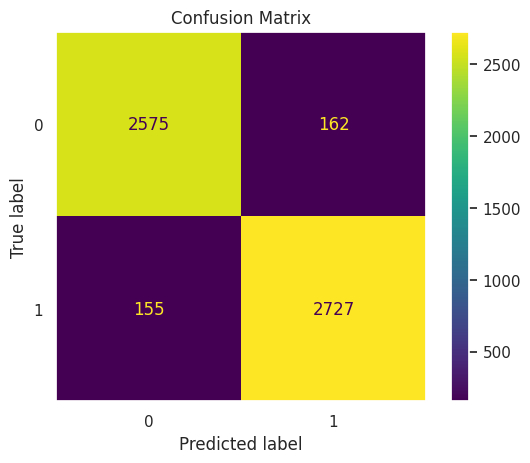

In [ ]:
#model re-building with parameter tuning
model_dtree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, random_state=42)
y_predict = model_dtree_tuned.fit(X_train, y_train).predict(X_test)

evaluate_model(model_dtree_tuned)

In [ ]:
#model validation
validate_model(model_dtree_tuned)

10 Folds Cross Validation:
[0.93135011 0.93211289 0.94279176 0.93440122 0.93440122 0.93440122
 0.94355454 0.93287567 0.9221968  0.9351145 ]
Mean: 0.9343199934785519


Feature: 0, Score: 0.36596, Name: Tenure
Feature: 1, Score: 0.04382, Name: City_Tier
Feature: 2, Score: 0.05035, Name: CC_Contacted_LY
Feature: 3, Score: 0.02146, Name: Payment
Feature: 4, Score: 0.00741, Name: Gender
Feature: 5, Score: 0.00802, Name: Service_Score
Feature: 6, Score: 0.02755, Name: Account_user_count
Feature: 7, Score: 0.02888, Name: account_segment
Feature: 8, Score: 0.06646, Name: CC_Agent_Score
Feature: 9, Score: 0.02185, Name: Marital_Status
Feature: 10, Score: 0.06086, Name: rev_per_month
Feature: 11, Score: 0.14850, Name: Complain_ly
Feature: 12, Score: 0.03516, Name: rev_growth_yoy
Feature: 13, Score: 0.01658, Name: coupon_used_for_payment
Feature: 14, Score: 0.04588, Name: Day_Since_CC_connect
Feature: 15, Score: 0.04462, Name: cashback
Feature: 16, Score: 0.00664, Name: Login_device


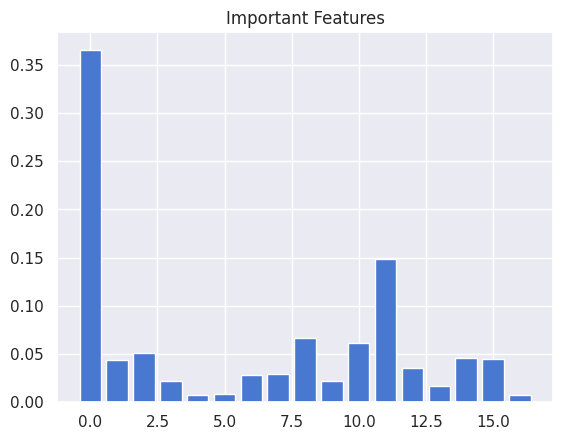

In [ ]:
#important feature extraction
get_fetures(model_dtree_tuned)

**Model Building - Random Forest**

Train Accuracy: 1.0
Train Confusion Matrix:
[[6627    0]
 [   0 6482]]
--------------------------------------------------
Test Accuracy: 0.9859405588182951
Test Confusion Matrix:
[[2683   54]
 [  25 2857]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2737
           1       0.98      0.99      0.99      2882

    accuracy                           0.99      5619
   macro avg       0.99      0.99      0.99      5619
weighted avg       0.99      0.99      0.99      5619

--------------------------------------------------
AUC Score: 0.9857979187209386
--------------------------------------------------


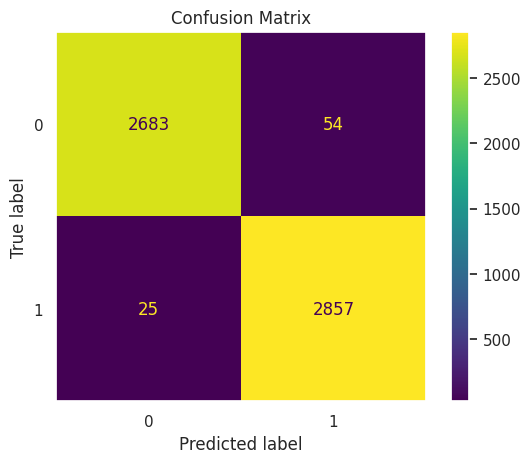

In [ ]:
#model building and evaluation : Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)
y_predict = rforest_model.predict(X_test)

evaluate_model(rforest_model)

In [ ]:
#model tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

'''
#disabled due to time consumption, need to optimise
param_dist = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800]}
'''
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792df5ec1c00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792df5a67ca0>})

In [ ]:
#Derive best combination for tuning
rf_best = rand_search.best_estimator_
test_accuracy(rf_best)

Train Accuracy: 1.0
Train Confusion Matrix:
[[6627    0]
 [   0 6482]]
--------------------------------------------------
Test Accuracy: 0.9841608827193451
Test Confusion Matrix:
[[2677   60]
 [  29 2853]]


In [ ]:
#get tuning parameters
rf_best

RandomForestClassifier(max_depth=19, n_estimators=56)

Train Accuracy: 0.9996948661225112
Train Confusion Matrix:
[[6624    3]
 [   1 6481]]
--------------------------------------------------
Test Accuracy: 0.9841608827193451
Test Confusion Matrix:
[[2675   62]
 [  27 2855]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2737
           1       0.98      0.99      0.98      2882

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619

--------------------------------------------------
AUC Score: 0.9839894833110506
--------------------------------------------------


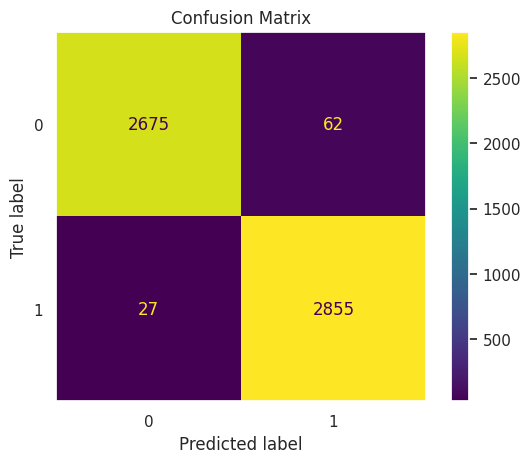

In [ ]:
# using the best parameters in the model and checking the performance
#the captured best parameters are plugged in as the parameters
rforest_model_tuned = RandomForestClassifier(n_estimators=236, max_depth=15, max_features='sqrt')
rforest_model_tuned.fit(X_train,y_train)
y_predict = rforest_model_tuned.predict(X_test)

evaluate_model(rforest_model_tuned)

In [ ]:
#model validation
validate_model(rforest_model_tuned)

10 Folds Cross Validation:
[0.97787948 0.96262395 0.97254005 0.98093059 0.98321892 0.98016781
 0.98169336 0.98245614 0.97330282 0.98015267]
Mean: 0.9774965791511636


Feature: 0, Score: 0.29186, Name: Tenure
Feature: 1, Score: 0.03744, Name: City_Tier
Feature: 2, Score: 0.04607, Name: CC_Contacted_LY
Feature: 3, Score: 0.02605, Name: Payment
Feature: 4, Score: 0.01387, Name: Gender
Feature: 5, Score: 0.02014, Name: Service_Score
Feature: 6, Score: 0.03730, Name: Account_user_count
Feature: 7, Score: 0.04649, Name: account_segment
Feature: 8, Score: 0.06281, Name: CC_Agent_Score
Feature: 9, Score: 0.03883, Name: Marital_Status
Feature: 10, Score: 0.05157, Name: rev_per_month
Feature: 11, Score: 0.13205, Name: Complain_ly
Feature: 12, Score: 0.04420, Name: rev_growth_yoy
Feature: 13, Score: 0.02801, Name: coupon_used_for_payment
Feature: 14, Score: 0.05683, Name: Day_Since_CC_connect
Feature: 15, Score: 0.05629, Name: cashback
Feature: 16, Score: 0.01020, Name: Login_device


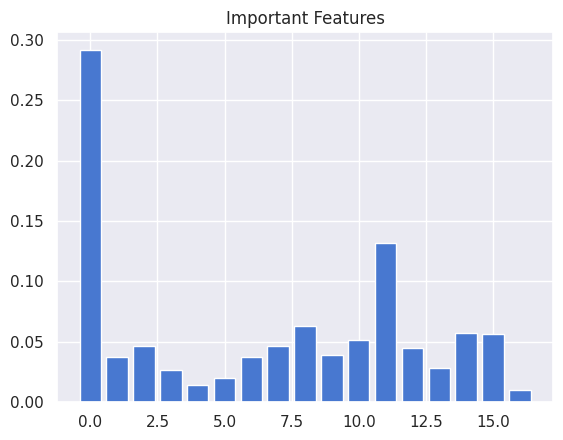

In [ ]:
#important feature extraction
get_fetures(rforest_model_tuned)

**Model Building - KNN**

Train Accuracy: 0.9866503928598672
Train Confusion Matrix:
[[6501  126]
 [  49 6433]]
--------------------------------------------------
Test Accuracy: 0.9594233849439402
Test Confusion Matrix:
[[2561  176]
 [  52 2830]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2737
           1       0.94      0.98      0.96      2882

    accuracy                           0.96      5619
   macro avg       0.96      0.96      0.96      5619
weighted avg       0.96      0.96      0.96      5619

--------------------------------------------------
AUC Score: 0.9588264959304182
--------------------------------------------------


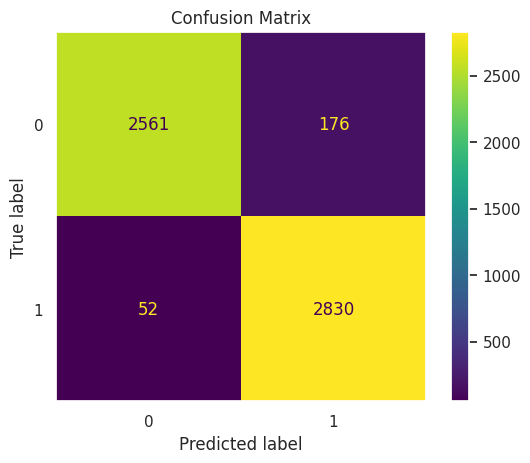

In [ ]:
# Model building and Evaluation : KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)

model_knn.fit(X_train,y_train)
y_predict = model_knn.predict(X_test)

evaluate_model(model_knn)

In [ ]:
from sklearn.model_selection import GridSearchCV
#model tuning
grid_params = { 'n_neighbors' : [3,4,5,6,7,8,9,10,11,12,13,14,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use grid search to find the best hyperparameters
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)

# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 78 candidates, totalling 234 fits


In [ ]:
# find the best score
g_res.best_score_

0.9707070077494532

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Train Accuracy: 1.0
Train Confusion Matrix:
[[6627    0]
 [   0 6482]]
--------------------------------------------------
Test Accuracy: 0.98896600818651
Test Confusion Matrix:
[[2689   48]
 [  14 2868]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2737
           1       0.98      1.00      0.99      2882

    accuracy                           0.99      5619
   macro avg       0.99      0.99      0.99      5619
weighted avg       0.99      0.99      0.99      5619

--------------------------------------------------
AUC Score: 0.9888024062776607
--------------------------------------------------


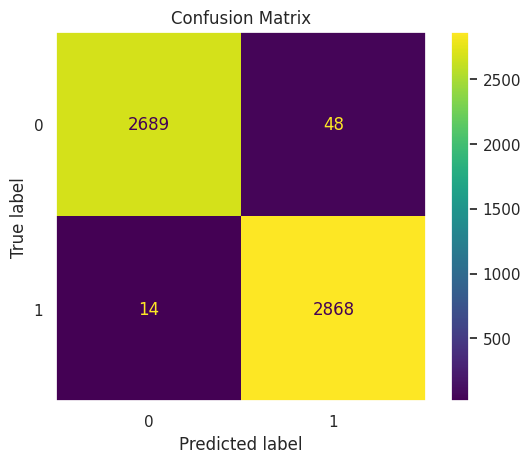

In [ ]:
# Model testing after tuning
model_knn_tuned = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan')
model_knn_tuned.fit(X_train, y_train)

y_predict = model_knn_tuned.predict(X_test)

evaluate_model(model_knn_tuned)

In [ ]:
#model validation
validate_model(model_knn_tuned)

10 Folds Cross Validation:
[0.98550725 0.9740656  0.97787948 0.98169336 0.98169336 0.97559115
 0.98016781 0.98169336 0.97559115 0.98778626]
Mean: 0.9801668791959985


Feature: 0, Score: 0.02470, Name: Tenure
Feature: 1, Score: 0.02260, Name: City_Tier
Feature: 2, Score: 0.01563, Name: CC_Contacted_LY
Feature: 3, Score: 0.01548, Name: Payment
Feature: 4, Score: 0.01968, Name: Gender
Feature: 5, Score: 0.01007, Name: Service_Score
Feature: 6, Score: 0.01306, Name: Account_user_count
Feature: 7, Score: 0.01267, Name: account_segment
Feature: 8, Score: 0.02605, Name: CC_Agent_Score
Feature: 9, Score: 0.01751, Name: Marital_Status
Feature: 10, Score: 0.01570, Name: rev_per_month
Feature: 11, Score: 0.02944, Name: Complain_ly
Feature: 12, Score: 0.01901, Name: rev_growth_yoy
Feature: 13, Score: 0.00626, Name: coupon_used_for_payment
Feature: 14, Score: 0.01381, Name: Day_Since_CC_connect
Feature: 15, Score: 0.00876, Name: cashback
Feature: 16, Score: 0.01100, Name: Login_device


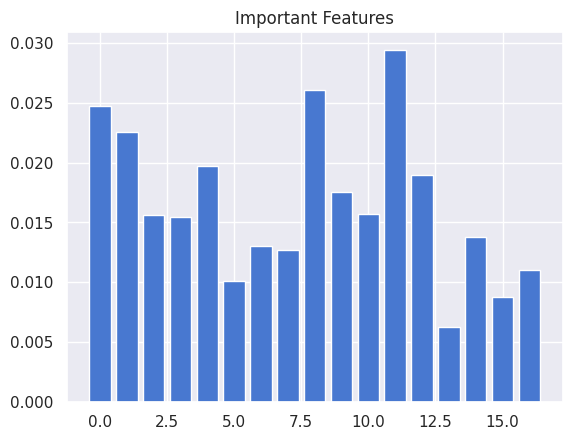

In [ ]:
#important feature extraction

# Calculate permutation importance for the tuned KNN model
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model_knn_tuned, X_test, y_test, n_repeats=5, random_state=42)

# Extract and print feature importance scores
feature_importance = perm_importance.importances_mean
for i,v in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f, Name: %s' % (i,v,columns[i]))

# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.title("Important Features")
plt.show()


**Model Building : Logistic Regression**

Train Accuracy: 0.8009001449385919
Train Confusion Matrix:
[[5215 1412]
 [1198 5284]]
--------------------------------------------------
Test Accuracy: 0.810464495461826
Test Confusion Matrix:
[[2142  595]
 [ 470 2412]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2737
           1       0.80      0.84      0.82      2882

    accuracy                           0.81      5619
   macro avg       0.81      0.81      0.81      5619
weighted avg       0.81      0.81      0.81      5619

--------------------------------------------------
AUC Score: 0.8097637510183147
--------------------------------------------------


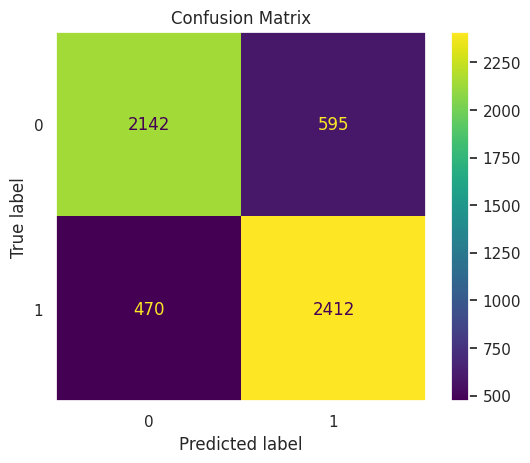

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)
y_predict = LR_model.predict(X_test)

evaluate_model(LR_model)

In [ ]:
#model tuning
grid_params = {'penalty' : ['l1', 'l2'],
    'C' : [1.0, 0.1, 0.01],
    'solver' : ['liblinear','saga']
    }

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Use grid search to find the best hyperparameters
gs = GridSearchCV(classifier, grid_params, verbose = 1, cv=3, n_jobs = -1)

# fit the model on our train set
grid_search = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
#Derive best combination for tuning
lr_best = grid_search.best_estimator_
test_accuracy(lr_best)

Train Accuracy: 0.8006712945304753
Train Confusion Matrix:
[[5213 1414]
 [1199 5283]]
--------------------------------------------------
Test Accuracy: 0.810464495461826
Test Confusion Matrix:
[[2142  595]
 [ 470 2412]]


In [ ]:
#get tuning parameters
lr_best

LogisticRegression(penalty='l1', solver='liblinear')

Train Accuracy: 0.800976428407964
Train Confusion Matrix:
[[5215 1412]
 [1197 5285]]
--------------------------------------------------
Test Accuracy: 0.810464495461826
Test Confusion Matrix:
[[2142  595]
 [ 470 2412]]
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2737
           1       0.80      0.84      0.82      2882

    accuracy                           0.81      5619
   macro avg       0.81      0.81      0.81      5619
weighted avg       0.81      0.81      0.81      5619

--------------------------------------------------
AUC Score: 0.8097637510183147
--------------------------------------------------


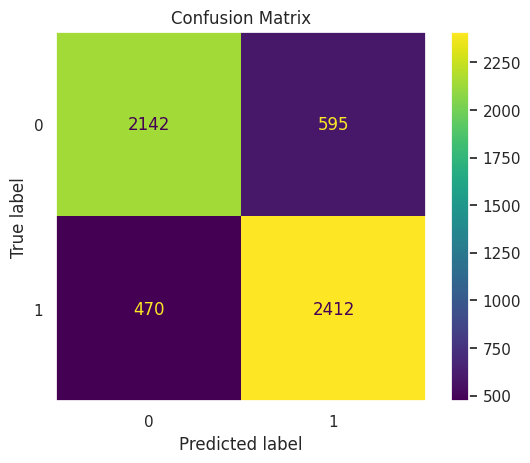

In [ ]:
# using the best parameters in the model and checking the performance
#the captured best parameters are plugged in as the parameters
#LR_model_tuned = LogisticRegression(C=0.1, penalty='l1', solver='saga')
LR_model_tuned = LogisticRegression(solver='liblinear')

LR_model_tuned.fit(X_train, y_train)
y_predict = LR_model_tuned.predict(X_test)

evaluate_model(LR_model_tuned)

In [ ]:
#model validation
validate_model(LR_model_tuned)

10 Folds Cross Validation:
[0.78871091 0.79633867 0.79176201 0.79710145 0.81006865 0.81464531
 0.80244088 0.7955759  0.79710145 0.81145038]
Mean: 0.8005195614326224


Feature: 0, Score: -1.15305, Name: Tenure
Feature: 1, Score: 0.31303, Name: City_Tier
Feature: 2, Score: 0.25219, Name: CC_Contacted_LY
Feature: 3, Score: -0.04795, Name: Payment
Feature: 4, Score: 0.20728, Name: Gender
Feature: 5, Score: -0.05542, Name: Service_Score
Feature: 6, Score: 0.33823, Name: Account_user_count
Feature: 7, Score: -0.48642, Name: account_segment
Feature: 8, Score: 0.36148, Name: CC_Agent_Score
Feature: 9, Score: 0.53716, Name: Marital_Status
Feature: 10, Score: 0.34124, Name: rev_per_month
Feature: 11, Score: 0.74179, Name: Complain_ly
Feature: 12, Score: -0.17757, Name: rev_growth_yoy
Feature: 13, Score: 0.18662, Name: coupon_used_for_payment
Feature: 14, Score: -0.28760, Name: Day_Since_CC_connect
Feature: 15, Score: -0.23742, Name: cashback
Feature: 16, Score: -0.03597, Name: Login_device


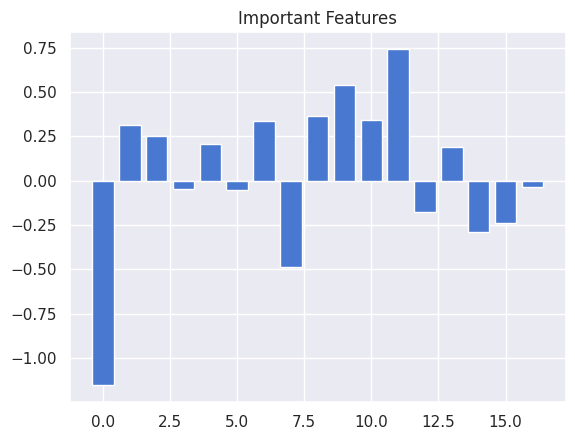

In [ ]:
#important feature extraction
importance = LR_model_tuned.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f, Name: %s' % (i,v,columns[i]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Important Features")
plt.show()